<a href="https://colab.research.google.com/github/doritos0812/Software_LAB_Class/blob/main/2015104013_%EA%B9%80%ED%98%95%EB%AF%BC_Ex_Approximations_of_pi_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex) Approximations of $\pi$ function

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_
_<div style="text-align: right"> Kunwoo Park (kunwoopark@khu.ac.kr) </div>_

In our first assignment, we've worked on the prime-counting function, which we call the _$\pi$ function_. Interestingly, there have been several trials to formalize the $\pi$ function by using several methods, among which you can use $\large{{x \over {\text{ln}x}}}$. Here are some useful inequalities for $\pi{(x)}$ implemented by $\large{{x \over {\text{ln}x}}}$.

$${x \over {\text{ln}x}}<\pi{(x)}<1.25506{x \over {\text{ln}x}}$$ 

for $x \geq 17$.

In this problem, you will be developing a code that plots functions which approximate $\pi(x)$ and compare them with the original $\pi(x)$. For those of you who didn't accomplish first assignment, here is some code for computigng $\pi(x)$, developed by one of your classmates.

In [ ]:
def Eratosthenes(n):
  
  prime_numbers = []

  if(n < 2):
    return prime_numbers
 
  else:
    consecutive_int = list((range(n+1)))
    mark = [1 for i in range(n+1)]
    for p in range(2, n+1):
      if(mark[p]):
        prime_numbers.append(consecutive_int[p])
        for i in range(2*p, n+1, p):
          mark[i] = 0
      p += 1
    return prime_numbers


def pi(n):
  return len(Eratosthenes(n))

<br>

_**(Problem 1)**_ Compute the three functions in the above inequalities and plot the results for $x=100$ to $x=100000$ with increment to 100.

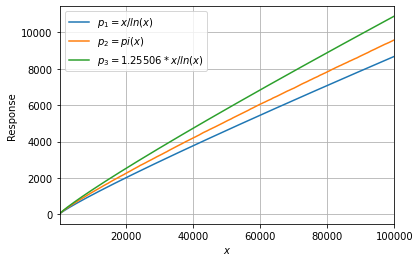

In [ ]:
# your code here
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(100,100000,100)
p1 = x/np.log(x)
p2=[]
for i in x:
  p2.append(pi(i))
p3 = 1.25506*x/np.log(x)

plt.plot(x,p1, label=r'$p_1=x/ln(x)$')
plt.plot(x,p2, label=r'$p_2=pi(x)$')
plt.plot(x,p3, label=r'$p_3=1.25506*x/ln(x)$')
plt.xlabel(r'$x$')
plt.ylabel('Response')
plt.xlim(100,100000)
plt.grid()
plt.legend()
plt.show()

<br>

${Li(x)}$ is another function that can represent $\pi{(x)}$ for all sufficiently large values of $x$. ${Li(x)}$ is defined as the below.
$$\int_{2}^{x} {1 \over {\text{ln}(t)}} dt$$
You can compute numerical integration by using the `scipy` library. For example, $\int_{0}^{1} {\text{ln}(x^2)} dx$ can be calculated by the following code.

In [ ]:
from scipy.integrate import quad

fx = lambda x: np.log(x**2)
val,err=quad( fx, 0, 1 )
print(val)
print(err)

-1.9999999999999998
2.2204460492503127e-15


<br>

_**(Problem 2)**_ Plot $Li(x)$ for $x=100$ to $x=100000$ with increment to 100, and compare the result from Problem 1.

In [ ]:
# your code here
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(100,100000,100)
p1 = x/np.log(x)
p2 = []
for i in x:
  p2.append(pi(i))
p3 = 1.25506*x/np.log(x)
fx = lambda t: 1/np.log(t)
p4 = []
for i in x:
  val,err=quad( fx, 2, i )
  p4.append(val)
plt.plot(x,p1, label=r'$p_1=x/ln(x)$')
plt.plot(x,p2, label=r'$p_2=pi(x)$')
plt.plot(x,p3, label=r'$p_3=1.25506*x/ln(x)$')
plt.plot(x,p4, label=r'$p_4=Li(x)$')
plt.xlabel(r'$x$')
plt.ylabel('Response')
plt.xlim(100,100000)
plt.grid()
plt.legend()
plt.show()

NameError: ignored

<br>

A brilliant mathematician created an incredible formula to approximate $\pi{(x)}$ as below. 
$$R(x)=1+\sum_{k=1}^{\infty} {(\text{ln} (x))^k \over {k!k \zeta(k+1)}}$$

This called the _Riemann's R-function_. $\zeta(s)$ is called the _Riemann zeta function_. You can search that zeta function which is implemented in scipy library. Also, You can find the factorial function in scipy library. Here are some examples for using those function.

In [ ]:
from scipy.special import factorial,zeta
print(factorial(3)) # print 3!
print(zeta(3)) #print zeta(3)


6.0
1.2020569031595942


_**(Problem 3)**_ Because of the memory limitations, you will not be able to calculate the above eqation with large $k$'s. So, we are going to limit $k$ to 100. Then you will approximate the following the function as below.

$$
R(x)=1+\sum_{k=1}^{100} {(\text{ln} (x))^k \over {k!k \zeta(k+1)}}
$$

Calculate R-function using scipy library and compare your results for $x=2$ to $x=1000$ with the original $\pi{(x)}$. You are recommended to examine your approximation with different $k$'s.

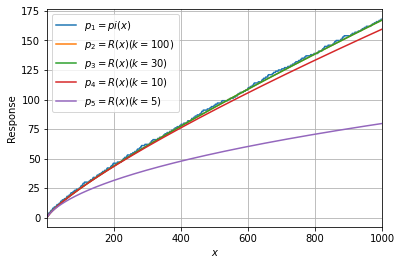

In [ ]:
x = np.arange(2, 1001)
p1 = []
for i in x:
  p1.append(pi(i))
plt.plot(x,p1, label=r'$p_1=pi(x)$')
p2 = []
p3 = []
p4 = []
p5 = []

def R(n,p):
  k=np.arange(1,p+1)
  sum=0
  for j in k:
   sum+=(np.log(n)**j)/(factorial(j)*j*zeta(j+1))
  return sum
for i in x:
  p2.append(R(i,100))
plt.plot(x,p2, label=r'$p_2=R(x) (k=100)$')
for i in x:
  p3.append(R(i,30))
plt.plot(x,p3, label=r'$p_3=R(x) (k=30)$')
for i in x:
  p4.append(R(i,10))
plt.plot(x,p4, label=r'$p_4=R(x) (k=10)$')
for i in x:
  p5.append(R(i,5))
plt.plot(x,p5, label=r'$p_5=R(x) (k=5)$')
plt.xlabel(r'$x$')
plt.ylabel('Response')
plt.xlim(2,1000)
plt.grid()
plt.legend()
plt.show()


In [ ]:
a = np.arange(10)
print(a[0])

0
